# **Importing Libraries:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")


**Loading the data** 

In [ ]:
df=pd.read_csv("/content/data.csv",index_col=0)

# **Data visualisation and analysis:**

In [ ]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [ ]:
df.describe()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.00000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,76.645423,16.995365,0.849363,49.400000,0.181924,0.107764,12.13905,28.002317,18.298957,11.840093,2.993048,0.998841,0.995365,0.125145
std,39.200264,7.809951,0.726062,15.079203,0.386005,0.310261,3.99787,7.473231,2.864064,1.183771,0.127251,0.034040,2.358767,0.331075
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.000000
25%,45.000000,11.000000,0.000000,40.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
50%,87.000000,18.000000,1.000000,49.400000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,0.000000,0.000000
75%,110.000000,24.000000,1.000000,57.000000,0.000000,0.000000,14.00000,31.000000,19.000000,12.000000,3.000000,1.000000,1.000000,0.000000
max,138.000000,33.000000,2.000000,96.000000,1.000000,1.000000,24.00000,31.000000,19.000000,12.000000,3.000000,1.000000,15.000000,1.000000


In [ ]:
df.shape

(863, 14)

**Check data palancing :**

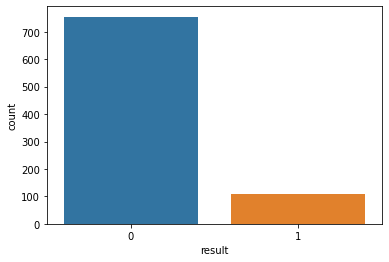

In [ ]:
import seaborn as sns
sns.countplot(df["result"],data=df);

**we found that the data is highly unbalanced**

**correlation between th features and the target column:**


In [ ]:
print ("the correlation between th features and the target column : \n " )
cor=df[df.columns[1:]].corr()['result'][:]
relevant_features = cor[cor>0.2]
print (cor)
print ("\nThe most relevant feature to target column: \n",relevant_features)

the correlation between th features and the target column : 
 
country        -0.094443
gender         -0.061441
age             0.515127
vis_wuhan      -0.151122
from_wuhan      0.128314
symptom1       -0.163039
symptom2       -0.103270
symptom3       -0.074982
symptom4       -0.108723
symptom5        0.020676
symptom6        0.012882
diff_sym_hos    0.219116
result          1.000000
Name: result, dtype: float64

The most relevant feature to target column: 
 age             0.515127
diff_sym_hos    0.219116
result          1.000000
Name: result, dtype: float64


**We found that age and diff_sym_hos are the features highly corlated to target column.**


**Correlation matrix between the features :**


<AxesSubplot:>

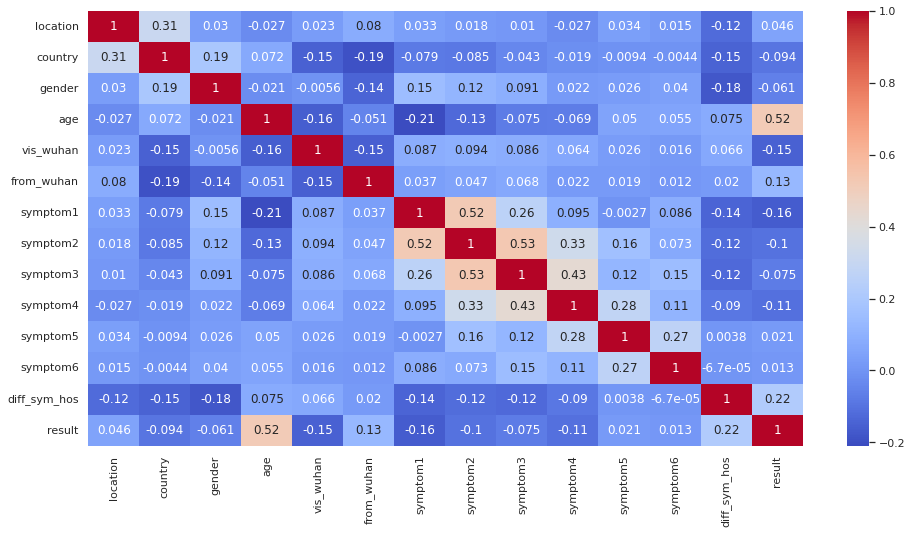

In [ ]:
import seaborn as sns 
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

**we found that all the columns are correlated to each other else the location and country features so we will drop them**

**Feature selection & Splitting data to train and test:**

In [ ]:
df.drop(['location', 'country'], axis=1, inplace=True)
Y = df['result']
X = df.drop('result', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, stratify=Y)
print(X_train.shape)
print(X_test.shape)

(690, 11)
(173, 11)


 # **Building Models**



# **K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# assign the hyperparameters for tuning and optimization
parameters = {'n_neighbors':[2,5,10,15,20,25,30,35,40,45,50]}

neigh = KNeighborsClassifier()
#search  for the optimal prameters for the classifier using Grid search
clf_knn = GridSearchCV(neigh, parameters,cv=3,scoring='roc_auc',return_train_score=False,verbose=1)

#fitting the model
clf_knn.fit(X_train,y_train)
print("the optimal hyperparameters for Knn model: ",clf_knn.best_params_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
the optimal hyperparameters for Knn model:  {'n_neighbors': 35}


**Testing the model and Printing yhe metrics :**

In [ ]:
y_pred= clf_knn.predict(X_test)
print("The confusion matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("\nThe classification report: \n\n",classification_report(y_test,y_pred))
print("\nAccuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))

The confusion matrix: 

 [[147   4]
 [  9  13]] 


The classification report: 

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       151
           1       0.76      0.59      0.67        22

    accuracy                           0.92       173
   macro avg       0.85      0.78      0.81       173
weighted avg       0.92      0.92      0.92       173


Accuracy 92.49%


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# assign the hyperparameters for tuning and optimization
parameters = {'penalty':["l1", "l2", "elasticnet", None],"C":[.001,.01,1,10,100]}

log = LogisticRegression(random_state=44)
#search  for the optimal prameters for the classifier using Grid search
clf_log = GridSearchCV(log, parameters,cv=3,scoring='roc_auc',return_train_score=False,verbose=1)

#fitting the model
clf_log.fit(X_train,y_train)
print("the optimal hyperparameters for Logistic Regression model: ",clf_log.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
the optimal hyperparameters for Logistic Regression model:  {'C': 0.001, 'penalty': None}


**Testing the model and Printing yhe metrics :**

In [ ]:
y_pred= clf_log.predict(X_test)
print("The confusion matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("\nThe classification report: \n\n",classification_report(y_test,y_pred))
print("\nAccuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))

The confusion matrix: 

 [[148   3]
 [ 11  11]] 


The classification report: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95       151
           1       0.79      0.50      0.61        22

    accuracy                           0.92       173
   macro avg       0.86      0.74      0.78       173
weighted avg       0.91      0.92      0.91       173


Accuracy 91.91%


# **Naïve Bayes**

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(X_train)
Xtest = scaler.fit_transform(X_test)

In [ ]:
# assign the hyperparameters for tuning and optimization
parameters = {"alpha":[1,10,100,1000]}

NB = ComplementNB(force_alpha=True)
#search  for the optimal prameters for the classifier using Grid search
clf_NB = GridSearchCV(NB, parameters,cv=3,scoring='roc_auc',return_train_score=False,verbose=1)

#fitting the model
clf_NB.fit(Xtrain,y_train)
print("the optimal hyperparameters for Naive Bayes model: ",clf_NB.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
the optimal hyperparameters for Naive Bayes model:  {'alpha': 10}


In [ ]:
y_pred= clf_NB.predict(Xtest)
print("The confusion matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("\nThe classification report: \n\n",classification_report(y_test,y_pred))
print("\nAccuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))

The confusion matrix: 

 [[ 48 103]
 [  1  21]] 


The classification report: 

               precision    recall  f1-score   support

           0       0.98      0.32      0.48       151
           1       0.17      0.95      0.29        22

    accuracy                           0.40       173
   macro avg       0.57      0.64      0.38       173
weighted avg       0.88      0.40      0.46       173


Accuracy 39.88%


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# assign the hyperparameters for tuning and optimization
parameters = {"criterion":["gini", "entropy", "log_loss"],"max_depth":[2,5,10,15,20],"min_samples_split":[2,5,10,15]}

DT = DecisionTreeClassifier(random_state=44)
#search  for the optimal prameters for the classifier using Grid search
clf_DT = GridSearchCV(DT, parameters,cv=3,scoring='roc_auc',return_train_score=False,verbose=1)

#fitting the model
clf_DT.fit(X_train,y_train)
print("the optimal hyperparameters for Decision Tree model: ",clf_DT.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
the optimal hyperparameters for Decision Tree model:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}


In [ ]:
y_pred= clf_DT.predict(X_test)
print("The confusion matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("\nThe classification report: \n\n",classification_report(y_test,y_pred))
print("\nAccuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))

The confusion matrix: 

 [[145   6]
 [  7  15]] 


The classification report: 

               precision    recall  f1-score   support

           0       0.95      0.96      0.96       151
           1       0.71      0.68      0.70        22

    accuracy                           0.92       173
   macro avg       0.83      0.82      0.83       173
weighted avg       0.92      0.92      0.92       173


Accuracy 92.49%


# **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

# assign the hyperparameters for tuning and optimization
parameters = {"C":[.001,.01,1,10,100,1000],"kernel":['linear', 'poly','rbf', 'sigmoid']}

SV = SVC(probability=True, random_state=44)
#search  for the optimal prameters for the classifier using Grid search
clf_SV = GridSearchCV(SV, parameters,cv=3,scoring='roc_auc',return_train_score=False,verbose=1)

#fitting the model
clf_SV.fit(X_train,y_train)
print("the optimal hyperparameters for SVM model: ",clf_SV.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
the optimal hyperparameters for SVM model:  {'C': 100, 'kernel': 'rbf'}


In [ ]:
y_pred= clf_SV.predict(X_test)
print("The confusion matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("\nThe classification report: \n\n",classification_report(y_test,y_pred))
print("\nAccuracy {0:.2f}%".format(100*accuracy_score(y_test, y_pred)))

The confusion matrix: 

 [[148   3]
 [  6  16]] 


The classification report: 

               precision    recall  f1-score   support

           0       0.96      0.98      0.97       151
           1       0.84      0.73      0.78        22

    accuracy                           0.95       173
   macro avg       0.90      0.85      0.88       173
weighted avg       0.95      0.95      0.95       173


Accuracy 94.80%


##**`Comparison between models by ROC :`**




In [ ]:
classifiers = [clf_knn, clf_log, clf_NB, clf_DT, clf_SV]
models_names = ["K-Nearest Neighbors","Logistic Regression","Naive Bayes","Decision Trees","Support Vector Machines"]
results = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
i=0
for cls in classifiers:
    if(cls!=clf_NB):
        yproba = cls.predict_proba(X_test)[::,1]
    else:
        yproba = cls.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)  
    results = results.append({'classifiers':models_names[i], 'fpr':fpr, 'tpr':tpr, 'auc':auc}, ignore_index=True)
    i+=1
results.set_index('classifiers', inplace=True)

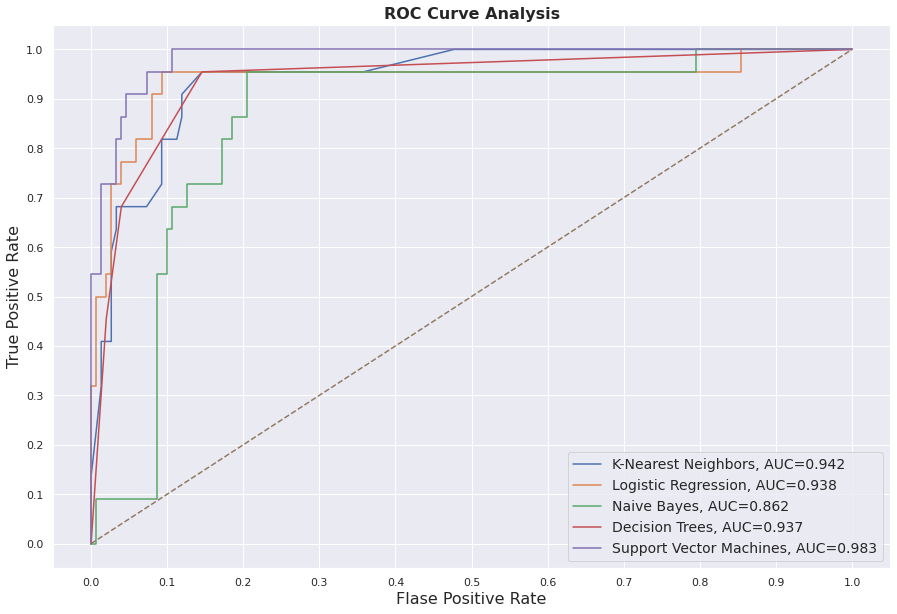

In [ ]:
fig = plt.figure(figsize=(15,10))
for i in models_names:
    plt.plot(results.loc[i]['fpr'], 
             results.loc[i]['tpr'],label="{}, AUC={:.3f}".format(i, results.loc[i]['auc']))

plt.plot([0,1], [0,1], linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=16)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=16)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=16)
plt.legend(prop={'size':14}, loc='lower right')

plt.show()

## As we see the Support Vector Machine **(SVM)** is the best model for this classification problem 